In [2]:
import os 
import sys
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.fft import fft

# Move up one directory from the notebook location
notebook_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add that directory to sys.path if not already present
if notebook_root not in sys.path:
    sys.path.insert(0, notebook_root)

from Matrix_methods.Simulate import simulate_reference, simulate_parallel
from Matrix_methods.AdamExtractor import LayeredExtractor
from Matrix_methods.BayesianExtractor import BayesianLayeredExtractor

Length of pulse array: 701
Bias: -0.18446526495726498


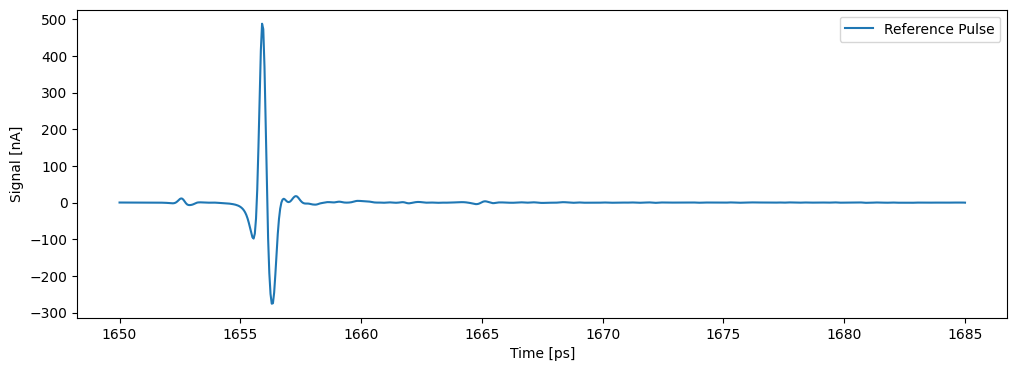

In [3]:
ref_path = 'Si_data/example_ref_pulse.csv'
ref_df = pd.read_csv(ref_path)
t_axis = ref_df['Time_abs/ps'].to_numpy()
reference_pulse = ref_df[' Signal/nA'].to_numpy()

## Remove Dc bias
halfway = len(reference_pulse) // 2
# Calculate the mean of the second half (assumed baseline)
bias = np.mean(reference_pulse[halfway:])
# Subtract the bias from the entire signal
reference_pulse = reference_pulse - bias

L = len(reference_pulse)
print(f'Length of pulse array: {L}')

print(f'Bias: {bias}')
plt.figure(figsize=(12,4))
plt.plot(t_axis, reference_pulse, label='Reference Pulse')
plt.xlabel('Time [ps]')
plt.ylabel('Signal [nA]')
plt.legend()
plt.show()

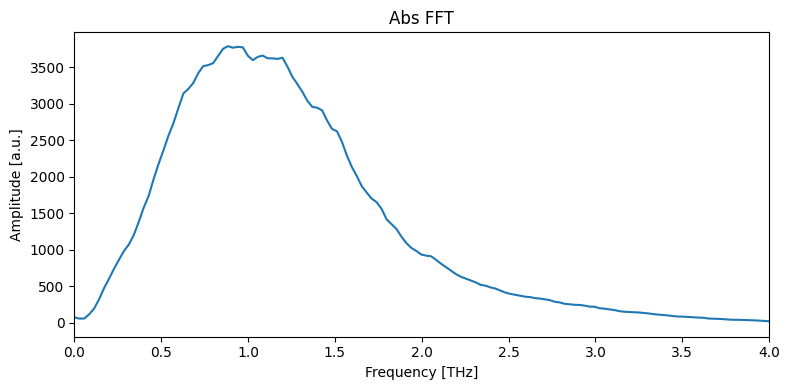

In [4]:
dt = np.mean(np.diff(t_axis*1e-12))
n = len(reference_pulse)
fft_result = np.fft.fft(reference_pulse)
freq = np.fft.fftfreq(n, d=dt)
freq_thz = freq * 1e-12

# Plot FFT
plt.figure(figsize=(8, 4))
plt.plot(freq_thz[:n//2], np.abs(fft_result[:n//2]))
plt.title('Abs FFT')
plt.xlabel('Frequency [THz]')
plt.ylabel('Amplitude [a.u.]')
plt.xlim(0, 4)
plt.grid(False)
plt.tight_layout()
plt.show()

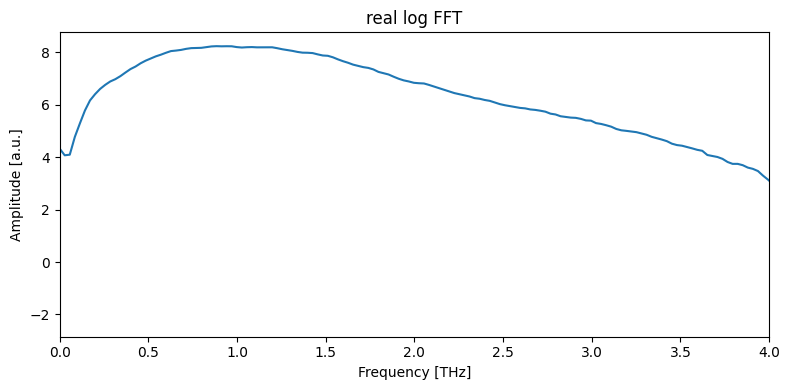

In [5]:
# Plot FFT
plt.figure(figsize=(8, 4))
plt.plot(freq_thz[:n//2], np.real(np.log(fft_result[:n//2])))
plt.title('real log FFT')
plt.xlabel('Frequency [THz]')
plt.ylabel('Amplitude [a.u.]')
plt.xlim(0, 4)
plt.grid(False)
plt.tight_layout()
plt.show()

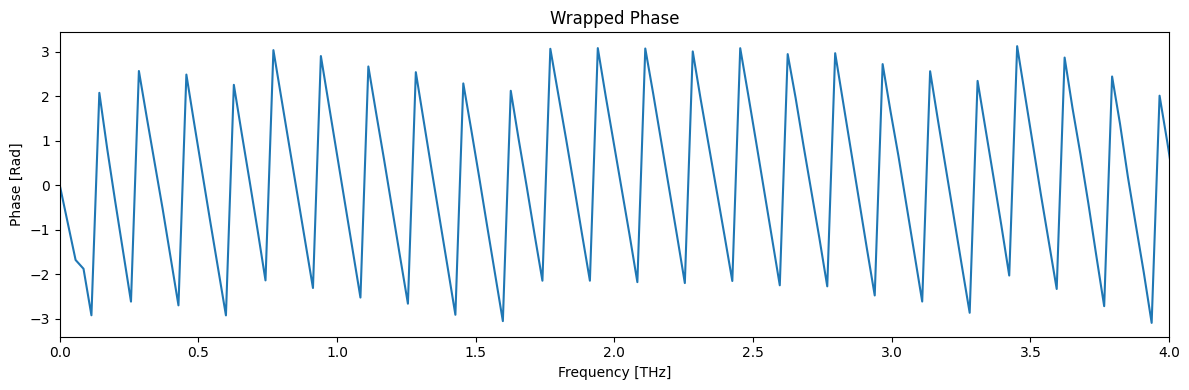

In [9]:
# Plot FFT
plt.figure(figsize=(12, 4))
plt.plot(freq_thz[:n//2], np.imag(np.log(fft_result[:n//2])))
plt.title('Wrapped Phase')
plt.xlabel('Frequency [THz]')
plt.ylabel('Phase [Rad]')
plt.xlim(0, 4)
plt.grid(False)
plt.tight_layout()
plt.show()